# Fasteignalána reiknivél

Amortization greiðlsa $A$ fyrir upphæð $P$ á $r$ vöxtum í $n$ tímabil reiknast sem
$$
A = P \frac{r (1 + r) ^ n}{(1 + r) ^ n - 1}
$$

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def amort_payment(principal, interests, periods):
    payments = principal * interests * (1 + interests) ** periods / ((1 + interests) ** periods - 1)
    return payments

Tökum dæmi um 40 ára lán upp á 25 m.kr. á 7,5% vöxtum.
Þar sem greiðslur eru mánaðarlegar eru það 40 * 12 tímabil og mánaðarvextir 7,5 / 12%.

In [3]:
hofudstoll = 25_000_000
vextir = 7.5 / 100 / 12
timabil = 40 * 12

Þá er fyrsta afborgun okkar:

In [4]:
print(f"{amort_payment(hofudstoll, vextir, timabil):_.0f}")

164_518


En í hverjum mánuði reiknast vextir og innborgun á lánið miðar við það. Prófum for lykkju sem reiknar sig í gegnum allar greiðslurnar.

In [5]:
eftir = hofudstoll

print("Vaxtagjöld  Innborgun  Greiðsla  Eftirstöðvar")
for t in range(timabil, 0, -1):
    vaxtagj = int(vextir * eftir)
    greidsla = int(amort_payment(eftir, vextir, t))
    innborgun = min(greidsla - vaxtagj, eftir)  # til að tryggja að síðasta afborgun sé slétt
    eftir -= innborgun
    print(f"{vaxtagj:10_} {innborgun:10_} {greidsla:9_} {eftir:13_}")


Vaxtagjöld  Innborgun  Greiðsla  Eftirstöðvar
   156_250      8_267   164_517    24_991_733
   156_198      8_319   164_517    24_983_414
   156_146      8_371   164_517    24_975_043
   156_094      8_423   164_517    24_966_620
   156_041      8_476   164_517    24_958_144
   155_988      8_529   164_517    24_949_615
   155_935      8_582   164_517    24_941_033
   155_881      8_636   164_517    24_932_397
   155_827      8_690   164_517    24_923_707
   155_773      8_744   164_517    24_914_963
   155_718      8_799   164_517    24_906_164
   155_663      8_854   164_517    24_897_310
   155_608      8_909   164_517    24_888_401
   155_552      8_965   164_517    24_879_436
   155_496      9_021   164_517    24_870_415
   155_440      9_077   164_517    24_861_338
   155_383      9_134   164_517    24_852_204
   155_326      9_191   164_517    24_843_013
   155_268      9_249   164_517    24_833_764
   155_211      9_306   164_517    24_824_458
   155_152      9_365   164_517   

Þetta var ánægjulegt en ekki sérstaklega aðgengilegt. Skulum því skilgreina Pandas data-frame og setja gildin inn í hann til að geta unnið með það áfram.

In [6]:
greidslur = pd.DataFrame({
    "Tímabil": pd.date_range(start=datetime.now(), periods=timabil + 1, freq="M"),
    "Vextir": None,
    "Innborgun": None,
    "Greiðsla": None,
    "Eftirstöðvar": None,
})

greidslur.loc[0, "Eftirstöðvar"] = hofudstoll

for t in range(timabil):
    eftir = greidslur.loc[t, "Eftirstöðvar"]
    vaxtagj = int(vextir * eftir)
    greidsla = int(amort_payment(eftir, vextir, timabil - t))
    innborgun = min(greidsla - vaxtagj, eftir)
    eftir -= innborgun
    greidslur.loc[t + 1, "Vextir"] = vaxtagj
    greidslur.loc[t + 1, "Innborgun"] = innborgun
    greidslur.loc[t + 1, "Greiðsla"] = greidsla
    greidslur.loc[t + 1, "Eftirstöðvar"] = eftir


In [7]:
greidslur

,Tímabil,Vextir,Innborgun,Greiðsla,Eftirstöðvar
0,2023-10-31 11:41:55.765161,None,None,None,25000000
1,2023-11-30 11:41:55.765161,156250,8267,164517,24991733
2,2023-12-31 11:41:55.765161,156198,8319,164517,24983414
3,2024-01-31 11:41:55.765161,156146,8371,164517,24975043
4,2024-02-29 11:41:55.765161,156094,8423,164517,24966620
...,...,...,...,...,...
476,2063-06-30 11:41:55.765161,5046,159471,164517,647917
477,2063-07-31 11:41:55.765161,4049,160469,164518,487448
478,2063-08-31 11:41:55.765161,3046,161471,164517,325977
479,2063-09-30 11:41:55.765161,2037,162481,164518,163496


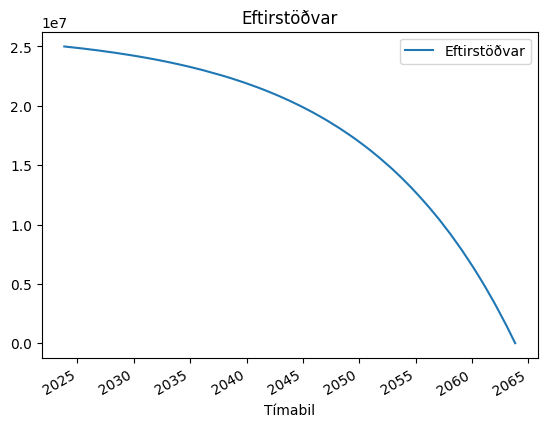

In [8]:
greidslur.plot(x="Tímabil", y="Eftirstöðvar")
plt.title("Eftirstöðvar")
plt.show()

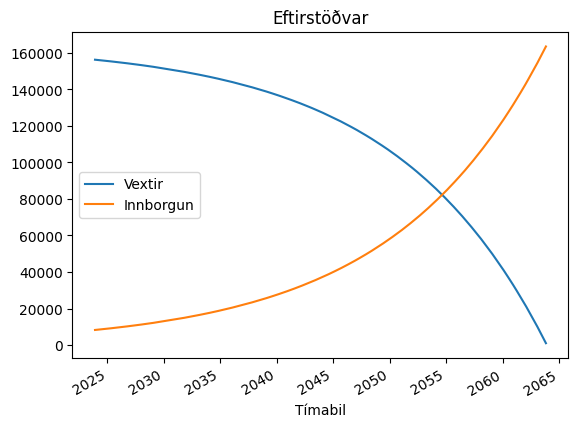

In [9]:
greidslur.plot(x="Tímabil", y=["Vextir", "Innborgun"])
plt.title("Eftirstöðvar")
plt.show()

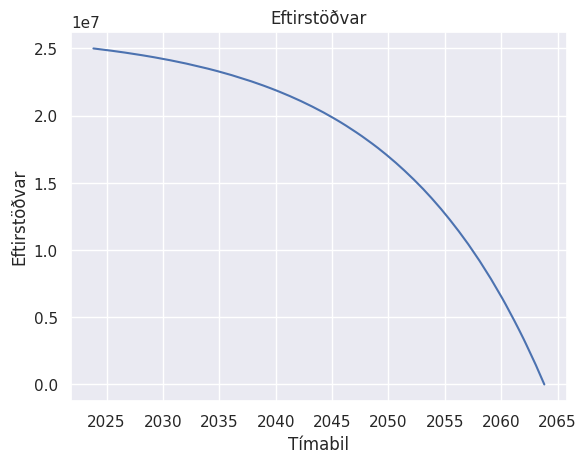

In [10]:
sns.set_theme()
sns.lineplot(greidslur, x="Tímabil", y="Eftirstöðvar")
plt.title("Eftirstöðvar")
plt.show()

Til að sjá hve mikið er greitt yfir tímabilið getum við reikna uppsafnaðar greiðslur. Vistum það í nýjan dataframe.

In [11]:
uppsafnad = pd.DataFrame({
    "Tímabil": greidslur.Tímabil,
    "Innborgun": greidslur.Innborgun.cumsum(),
    "Vextir": greidslur.Vextir.cumsum(),
})


In [12]:
uppsafnad

,Tímabil,Innborgun,Vextir
0,2023-10-31 11:41:55.765161,NaN,NaN
1,2023-11-30 11:41:55.765161,8267.0,156250.0
2,2023-12-31 11:41:55.765161,16586.0,312448.0
3,2024-01-31 11:41:55.765161,24957.0,468594.0
4,2024-02-29 11:41:55.765161,33380.0,624688.0
...,...,...,...
476,2063-06-30 11:41:55.765161,24352083.0,53958176.0
477,2063-07-31 11:41:55.765161,24512552.0,53962225.0
478,2063-08-31 11:41:55.765161,24674023.0,53965271.0
479,2063-09-30 11:41:55.765161,24836504.0,53967308.0


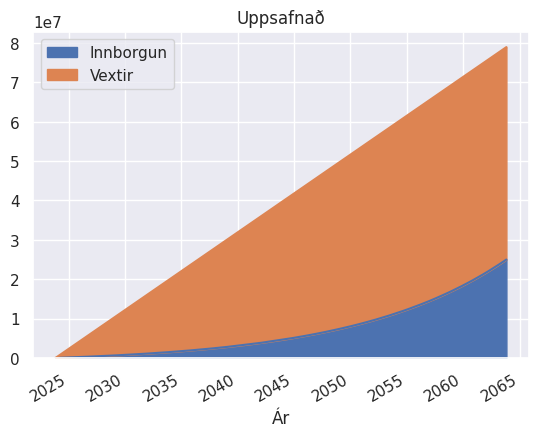

In [13]:
uppsafnad.plot.area(x="Tímabil", y=["Innborgun", "Vextir"])
plt.title("Uppsafnað")
plt.xlabel('Ár')
plt.show()

In [14]:
uppsafnad

,Tímabil,Innborgun,Vextir
0,2023-10-31 11:41:55.765161,NaN,NaN
1,2023-11-30 11:41:55.765161,8267.0,156250.0
2,2023-12-31 11:41:55.765161,16586.0,312448.0
3,2024-01-31 11:41:55.765161,24957.0,468594.0
4,2024-02-29 11:41:55.765161,33380.0,624688.0
...,...,...,...
476,2063-06-30 11:41:55.765161,24352083.0,53958176.0
477,2063-07-31 11:41:55.765161,24512552.0,53962225.0
478,2063-08-31 11:41:55.765161,24674023.0,53965271.0
479,2063-09-30 11:41:55.765161,24836504.0,53967308.0


Skellum nú í fall sem gefur þetta með valmöguleika um innborganir og vaxtagjöld

In [15]:

def lanareiknir(hofudstoll, vextir, timabil, kostnadur=None, auka=None, byrjun=None):
    if not kostnadur:
        kostnadur = 0
    if not auka:
        auka = 0
    if not byrjun:
        byrjun = datetime.now()
    lan = pd.DataFrame({
        "Tímabil": pd.date_range(start=byrjun, periods=timabil + 1, freq="M"),
        "Vextir": None,
        "Innborgun": None,
        "Kostnadur": None,
        "Auka": None,
        "Greitt": None,
        "Eftirstöðvar": None,
    })

    lan.loc[0, "Eftirstöðvar"] = hofudstoll

    for t in range(timabil):
        eftir = lan.loc[t, "Eftirstöðvar"]
        vaxtagj = int(vextir * eftir)
        greidsla = int(amort_payment(eftir, vextir, timabil - t))
        innborgun = min(greidsla - vaxtagj, eftir)
        eftir -= innborgun
        auka = min(auka, eftir)
        eftir -= auka
        kostnadur = kostnadur if innborgun > 0 else 0
        greitt = innborgun + vaxtagj + auka + kostnadur
        lan.loc[t + 1, "Vextir"] = vaxtagj
        lan.loc[t + 1, "Innborgun"] = innborgun
        lan.loc[t + 1, "Kostnadur"] = kostnadur
        lan.loc[t + 1, "Auka"] = auka
        lan.loc[t + 1, "Greitt"] = greitt
        lan.loc[t + 1, "Eftirstöðvar"] = eftir
    return lan


Gerum svo tvö köll í þetta nýja fall okkar, eitt með og eitt án aukagreiðslum (miðum við innborganir af séreignasparnaði, i.e. leiðrétting).

In [16]:
greidslur = lanareiknir(
    hofudstoll=25_000_000, 
    vextir=7.5 / 100 / 12,
    timabil=40*12,
    kostnadur=120,
    auka=0,
    byrjun=datetime(2023, 1, 1)).merge(
        lanareiknir(
        hofudstoll=25_000_000, 
        vextir=7.5 / 100 / 12,
        timabil=40*12,
        kostnadur=120,
        auka=333_000 / 12,   # Séreignasparnaður
        byrjun=datetime(2023, 1, 1)
        ),
        how='inner', on='Tímabil', suffixes=('', '_auka'))

In [17]:
greidslur

,Tímabil,Vextir,Innborgun,Kostnadur,Auka,Greitt,Eftirstöðvar,Vextir_auka,Innborgun_auka,Kostnadur_auka,Auka_auka,Greitt_auka,Eftirstöðvar_auka
0,2023-01-31,None,None,None,None,None,25000000,None,None,None,None,None,25000000
1,2023-02-28,156250,8267,120,0,164637,24991733,156250,8267,120,27750.0,192387.0,24963983.0
2,2023-03-31,156198,8319,120,0,164637,24983414,156024,8311,120,27750.0,192205.0,24927922.0
3,2023-04-30,156146,8371,120,0,164637,24975043,155799,8353,120,27750.0,192022.0,24891819.0
4,2023-05-31,156094,8423,120,0,164637,24966620,155573,8396,120,27750.0,191839.0,24855673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2062-09-30,5046,159471,120,0,164637,647917,0,0,0,0.0,0.0,0.0
477,2062-10-31,4049,160469,120,0,164638,487448,0,0,0,0.0,0.0,0.0
478,2062-11-30,3046,161471,120,0,164637,325977,0,0,0,0.0,0.0,0.0
479,2062-12-31,2037,162481,120,0,164638,163496,0,0,0,0.0,0.0,0.0


<Axes: xlabel='Tímabil'>

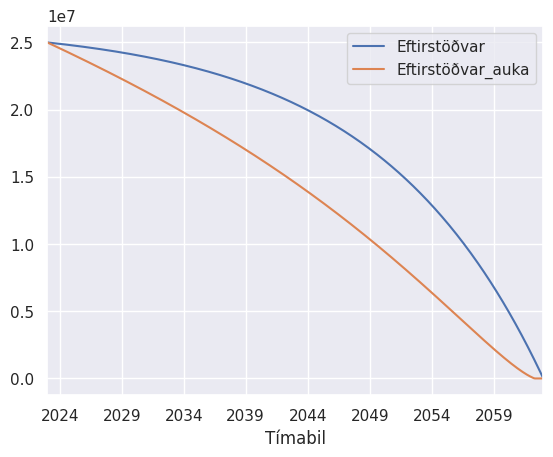

In [18]:
greidslur.plot(x='Tímabil', y=['Eftirstöðvar', 'Eftirstöðvar_auka'])

<Axes: xlabel='Tímabil'>

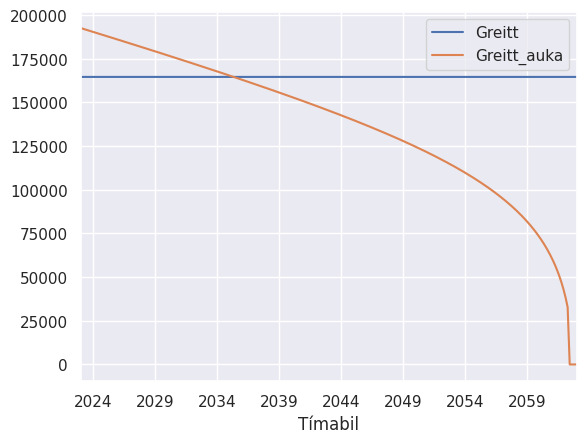

In [19]:
greidslur.plot(x='Tímabil', y=['Greitt', 'Greitt_auka'])

<Axes: xlabel='Tímabil'>

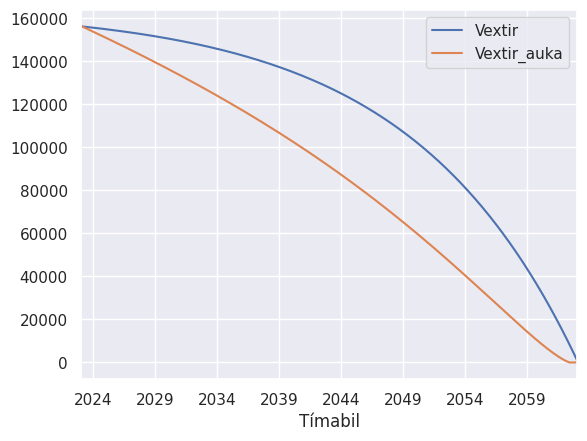

In [20]:
greidslur.plot(x='Tímabil', y=['Vextir', 'Vextir_auka'])

In [21]:
uppsafnad = pd.DataFrame({
    "Tímabil": greidslur.Tímabil,
    "Innborgun": greidslur.Innborgun.cumsum(),
    "Innborgun_auka": greidslur.Innborgun_auka.cumsum(),
    "Vextir": greidslur.Vextir.cumsum(),
    "Vextir_auka": greidslur.Vextir_auka.cumsum(),
    "Auka": greidslur.Auka.cumsum(),
    "Auka_auka": greidslur.Auka_auka.cumsum(),
    "Kostnadur": greidslur.Kostnadur.cumsum(),
    "Kostnadur_auka": greidslur.Kostnadur_auka.cumsum(),
})
uppsafnad = uppsafnad.replace(np.nan, 0)

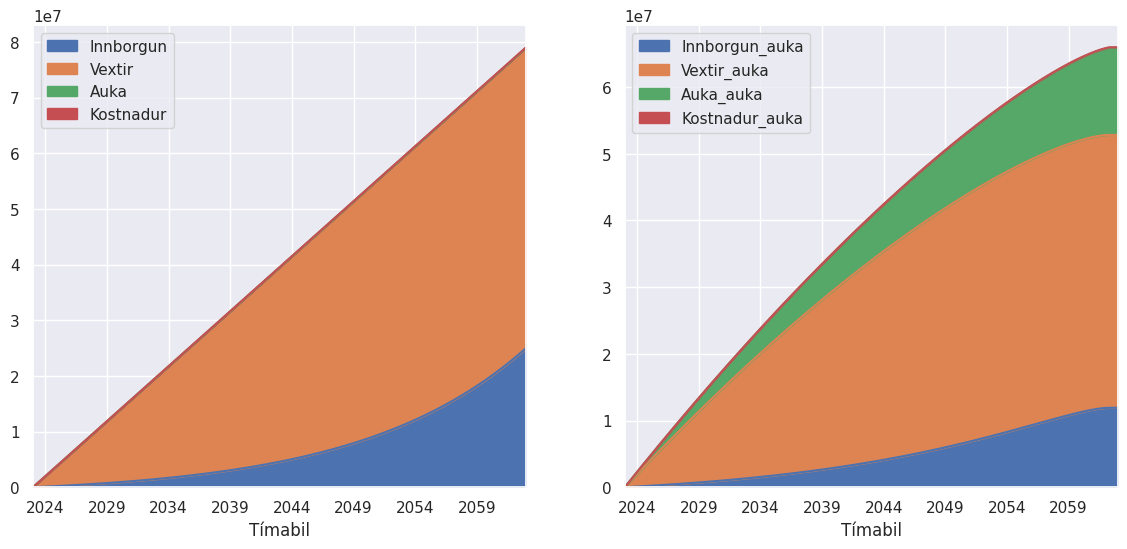

In [22]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
uppsafnad.plot.area(ax=ax1, x="Tímabil", y=["Innborgun", "Vextir", "Auka", "Kostnadur"])
uppsafnad.plot.area(ax=ax2, x="Tímabil", y=["Innborgun_auka", "Vextir_auka", "Auka_auka", "Kostnadur_auka"])
plt.show()

In [23]:
uppsafnad


,Tímabil,Innborgun,Innborgun_auka,Vextir,Vextir_auka,Auka,Auka_auka,Kostnadur,Kostnadur_auka
0,2023-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-02-28,8267.0,8267.0,156250.0,156250.0,0.0,27750.0,120.0,120.0
2,2023-03-31,16586.0,16578.0,312448.0,312274.0,0.0,55500.0,240.0,240.0
3,2023-04-30,24957.0,24931.0,468594.0,468073.0,0.0,83250.0,360.0,360.0
4,2023-05-31,33380.0,33327.0,624688.0,623646.0,0.0,111000.0,480.0,480.0
...,...,...,...,...,...,...,...,...,...
476,2062-09-30,24352083.0,11916053.0,53958176.0,40908844.0,0.0,13083947.0,57120.0,56640.0
477,2062-10-31,24512552.0,11916053.0,53962225.0,40908844.0,0.0,13083947.0,57240.0,56640.0
478,2062-11-30,24674023.0,11916053.0,53965271.0,40908844.0,0.0,13083947.0,57360.0,56640.0
479,2062-12-31,24836504.0,11916053.0,53967308.0,40908844.0,0.0,13083947.0,57480.0,56640.0
